# importing required packages

In [15]:
import requests
import json
from io import StringIO
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

# 483 Inspection - ORA Reading Room

### Link to the 483 Inspection PDF files from ORA Reading Room
https://www.fda.gov/about-fda/office-regulatory-affairs/ora-foia-electronic-reading-room

In [16]:
text = requests.get("https://www.fda.gov/datatables/views/ajax?search_api_fulltext=Jude&foia_record_type_name=&draw=8&columns%5B0%5D%5Bdata%5D=0&columns%5B0%5D%5Bname%5D=&columns%5B0%5D%5Bsearchable%5D=true&columns%5B0%5D%5Borderable%5D=true&columns%5B0%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B0%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B1%5D%5Bdata%5D=1&columns%5B1%5D%5Bname%5D=&columns%5B1%5D%5Bsearchable%5D=true&columns%5B1%5D%5Borderable%5D=true&columns%5B1%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B1%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B2%5D%5Bdata%5D=2&columns%5B2%5D%5Bname%5D=&columns%5B2%5D%5Bsearchable%5D=true&columns%5B2%5D%5Borderable%5D=true&columns%5B2%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B2%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B3%5D%5Bdata%5D=3&columns%5B3%5D%5Bname%5D=&columns%5B3%5D%5Bsearchable%5D=true&columns%5B3%5D%5Borderable%5D=true&columns%5B3%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B3%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B4%5D%5Bdata%5D=4&columns%5B4%5D%5Bname%5D=&columns%5B4%5D%5Bsearchable%5D=true&columns%5B4%5D%5Borderable%5D=true&columns%5B4%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B4%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B5%5D%5Bdata%5D=5&columns%5B5%5D%5Bname%5D=&columns%5B5%5D%5Bsearchable%5D=true&columns%5B5%5D%5Borderable%5D=true&columns%5B5%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B5%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B6%5D%5Bdata%5D=6&columns%5B6%5D%5Bname%5D=&columns%5B6%5D%5Bsearchable%5D=true&columns%5B6%5D%5Borderable%5D=true&columns%5B6%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B6%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B7%5D%5Bdata%5D=7&columns%5B7%5D%5Bname%5D=&columns%5B7%5D%5Bsearchable%5D=true&columns%5B7%5D%5Borderable%5D=false&columns%5B7%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B7%5D%5Bsearch%5D%5Bregex%5D=false&start=0&length=10&search%5Bvalue%5D=&search%5Bregex%5D=false&_drupal_ajax=1&_wrapper_format=drupal_ajax&pager_element=0&view_args=&view_base_path=about-fda%2Foffice-regulatory-affairs%2Fora-foia-electronic-reading-room%2Fdownload&view_display_id=reading_room_datatable_block&view_dom_id=54a29e27ba5b4d37febcdedfb628845623f1c70c62c430a7207a6ef854a67422&view_name=ora_foia_electronic_reading_room_solr&view_path=%2Fabout-fda%2Foffice-regulatory-affairs%2Fora-foia-electronic-reading-room&total_items=2300&_=1652984166794")

In [17]:
json.loads(text.text).keys()
json.loads(text.text)["recordsTotal"]
json.loads(text.text)["recordsFiltered"]
json.loads(text.text)["data"]
len(json.loads(text.text)["data"])

8

In [18]:
#json.loads(text.text)["data"][0]

In [19]:
st_jude_response = json.loads(text.text)["data"]

In [20]:
#st_jude_response

In [21]:
list_of_urls = list()
for i, text in enumerate(st_jude_response):
    list_of_urls.append(text[3].split("<a href=")[1].split(">")[0][1:-1])

list_of_urls

['/media/85385/download',
 '/media/85654/download',
 '/media/104436/download',
 '/media/84912/download',
 '/media/84896/download',
 '/media/84833/download',
 '/media/84940/download',
 '/media/84851/download']

In [22]:
url_base = "https://www.fda.gov"

In [23]:
urls_to_be_fired = list()
for i,url in enumerate(list_of_urls):
    url_final = url_base + url
    urls_to_be_fired.append(url_final)
    
urls_to_be_fired

['https://www.fda.gov/media/85385/download',
 'https://www.fda.gov/media/85654/download',
 'https://www.fda.gov/media/104436/download',
 'https://www.fda.gov/media/84912/download',
 'https://www.fda.gov/media/84896/download',
 'https://www.fda.gov/media/84833/download',
 'https://www.fda.gov/media/84940/download',
 'https://www.fda.gov/media/84851/download']

In [25]:
list_of_responses[0].headers["Content-Disposition"].split("inline; filename=")[1].split(".pdf")[0]

'St-Jude-Medical-IESD--Sylmar--CA--Warning-Letter-Response-Dated-2-4-2013'

In [28]:
def extract_483(search):
    url = f"https://www.fda.gov/datatables/views/ajax?search_api_fulltext={search}&foia_record_type_name=&draw=8&columns%5B0%5D%5Bdata%5D=0&columns%5B0%5D%5Bname%5D=&columns%5B0%5D%5Bsearchable%5D=true&columns%5B0%5D%5Borderable%5D=true&columns%5B0%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B0%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B1%5D%5Bdata%5D=1&columns%5B1%5D%5Bname%5D=&columns%5B1%5D%5Bsearchable%5D=true&columns%5B1%5D%5Borderable%5D=true&columns%5B1%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B1%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B2%5D%5Bdata%5D=2&columns%5B2%5D%5Bname%5D=&columns%5B2%5D%5Bsearchable%5D=true&columns%5B2%5D%5Borderable%5D=true&columns%5B2%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B2%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B3%5D%5Bdata%5D=3&columns%5B3%5D%5Bname%5D=&columns%5B3%5D%5Bsearchable%5D=true&columns%5B3%5D%5Borderable%5D=true&columns%5B3%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B3%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B4%5D%5Bdata%5D=4&columns%5B4%5D%5Bname%5D=&columns%5B4%5D%5Bsearchable%5D=true&columns%5B4%5D%5Borderable%5D=true&columns%5B4%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B4%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B5%5D%5Bdata%5D=5&columns%5B5%5D%5Bname%5D=&columns%5B5%5D%5Bsearchable%5D=true&columns%5B5%5D%5Borderable%5D=true&columns%5B5%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B5%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B6%5D%5Bdata%5D=6&columns%5B6%5D%5Bname%5D=&columns%5B6%5D%5Bsearchable%5D=true&columns%5B6%5D%5Borderable%5D=true&columns%5B6%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B6%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B7%5D%5Bdata%5D=7&columns%5B7%5D%5Bname%5D=&columns%5B7%5D%5Bsearchable%5D=true&columns%5B7%5D%5Borderable%5D=false&columns%5B7%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B7%5D%5Bsearch%5D%5Bregex%5D=false&start=0&length=10&search%5Bvalue%5D=&search%5Bregex%5D=false&_drupal_ajax=1&_wrapper_format=drupal_ajax&pager_element=0&view_args=&view_base_path=about-fda%2Foffice-regulatory-affairs%2Fora-foia-electronic-reading-room%2Fdownload&view_display_id=reading_room_datatable_block&view_dom_id=54a29e27ba5b4d37febcdedfb628845623f1c70c62c430a7207a6ef854a67422&view_name=ora_foia_electronic_reading_room_solr&view_path=%2Fabout-fda%2Foffice-regulatory-affairs%2Fora-foia-electronic-reading-room&total_items=2300&_=1652984166794"
    text = requests.get(url)
    search_response = json.loads(text.text)["data"]
    list_of_urls = list()
    for i, text in enumerate(search_response):
        if "<a href" in text[3]:
            list_of_urls.append(text[3].split("<a href=")[1].split(">")[0][1:-1])
    
    url_base = "https://www.fda.gov"
    urls_to_be_fired = list()
    for i, url in enumerate(list_of_urls):
        url_final = url_base + url
        urls_to_be_fired.append(url_final)

    list_of_responses = list()
    for i, text in enumerate(urls_to_be_fired):
        final_response = requests.get(text,allow_redirects=True)
        list_of_responses.append(final_response)

    for i,response in enumerate(list_of_responses):
        output_string = StringIO()
        with open(response.headers["Content-Disposition"].split("inline; filename=")[1].split(".pdf")[0]+".pdf", 'rb') as in_file:
            parser = PDFParser(in_file)
            doc = PDFDocument(parser)
            rscmgr = PDFResourceManager()
            device = TextConverter(rscmgr, output_string, laparams=LAParams())
            interpreter = PDFPageInterpreter(rscmgr, device)
            for page in PDFPage.create_pages(doc):
                interpreter.process_page(page)

    for i,response in enumerate(list_of_responses):
        pdf = open(response.headers["Content-Disposition"].split("inline; filename=")[1].split(".pdf")[0]+".pdf", 'wb')
        pdf.write(response.content)
        pdf.close()
    

In [29]:
url = f"https://www.fda.gov/datatables/views/ajax?search_api_fulltext=edwards&foia_record_type_name=&draw=8&columns%5B0%5D%5Bdata%5D=0&columns%5B0%5D%5Bname%5D=&columns%5B0%5D%5Bsearchable%5D=true&columns%5B0%5D%5Borderable%5D=true&columns%5B0%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B0%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B1%5D%5Bdata%5D=1&columns%5B1%5D%5Bname%5D=&columns%5B1%5D%5Bsearchable%5D=true&columns%5B1%5D%5Borderable%5D=true&columns%5B1%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B1%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B2%5D%5Bdata%5D=2&columns%5B2%5D%5Bname%5D=&columns%5B2%5D%5Bsearchable%5D=true&columns%5B2%5D%5Borderable%5D=true&columns%5B2%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B2%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B3%5D%5Bdata%5D=3&columns%5B3%5D%5Bname%5D=&columns%5B3%5D%5Bsearchable%5D=true&columns%5B3%5D%5Borderable%5D=true&columns%5B3%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B3%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B4%5D%5Bdata%5D=4&columns%5B4%5D%5Bname%5D=&columns%5B4%5D%5Bsearchable%5D=true&columns%5B4%5D%5Borderable%5D=true&columns%5B4%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B4%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B5%5D%5Bdata%5D=5&columns%5B5%5D%5Bname%5D=&columns%5B5%5D%5Bsearchable%5D=true&columns%5B5%5D%5Borderable%5D=true&columns%5B5%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B5%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B6%5D%5Bdata%5D=6&columns%5B6%5D%5Bname%5D=&columns%5B6%5D%5Bsearchable%5D=true&columns%5B6%5D%5Borderable%5D=true&columns%5B6%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B6%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B7%5D%5Bdata%5D=7&columns%5B7%5D%5Bname%5D=&columns%5B7%5D%5Bsearchable%5D=true&columns%5B7%5D%5Borderable%5D=false&columns%5B7%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B7%5D%5Bsearch%5D%5Bregex%5D=false&start=0&length=10&search%5Bvalue%5D=&search%5Bregex%5D=false&_drupal_ajax=1&_wrapper_format=drupal_ajax&pager_element=0&view_args=&view_base_path=about-fda%2Foffice-regulatory-affairs%2Fora-foia-electronic-reading-room%2Fdownload&view_display_id=reading_room_datatable_block&view_dom_id=54a29e27ba5b4d37febcdedfb628845623f1c70c62c430a7207a6ef854a67422&view_name=ora_foia_electronic_reading_room_solr&view_path=%2Fabout-fda%2Foffice-regulatory-affairs%2Fora-foia-electronic-reading-room&total_items=2300&_=1652984166794"

In [30]:
text = requests.get(url)
search_response = json.loads(text.text)['data']

In [31]:
search_response

[['Edwards Lifesciences, LLC',
  '<time datetime="2015-07-11T01:30:00Z">07/10/2015</time>\n',
  '1713910',
  '<a href="/media/88453/download">483</a>',
  'Utah',
  'Medical Device Manufacturer',
  '<time datetime="2019-04-20T03:19:41Z">04/19/2019</time>\n',
  '… R. Lunsford, Cor orate Vice President and General Hanager <strong>Edwards</strong> Lifesciences, LLC 12050 Lone Peak Pkwy TYl&#039;E … R. Lunsford, Corporate Vice President and General Manager <strong>Edwards</strong> Lifesciences, LLC 12050 Lone Peak Ph&lt;y CITY, … Corporate Vice President and General Manager STREETADDRESS <strong>Edwards</strong> Lifesciences, LLC 12050 Lone Peak Pkwy CITY, STAlE, …'],
 ['Cal-Maine Farms, Inc.',
  '<time datetime="2015-07-11T01:25:00Z">07/10/2015</time>\n',
  '3004327090',
  '',
  'Mississippi',
  'Shell Egg Producer',
  '<time datetime="2019-04-20T02:58:38Z">04/19/2019</time>\n',
  '… FEI: 3004327090 Cal-Maine Farms, Inc. EI Start: 05/31/2011 <strong>Edwards</strong>, MS 39066 EI End: 06/02

In [32]:
extract_483('jude')

# 

# Warning Letters
## Link to the Warning Letters from FDA website
https://www.fda.gov/inspections-compliance-enforcement-and-criminal-investigations/compliance-actions-and-activities/warning-letters

In [28]:
import requests
import json
import re
from bs4 import BeautifulSoup
from urllib.request import urlopen


def extract_warning_letter_list(search):
    url = f"https://www.fda.gov/datatables/views/ajax?search_api_fulltext={search}&search_api_fulltext_issuing_office=&field_letter_issue_datetime=All&field_change_date_closeout_letter=&field_change_date_response_letter=&field_change_date_2=All&field_letter_issue_datetime_2=&draw=4&columns%5B0%5D%5Bdata%5D=0&columns%5B0%5D%5Bname%5D=&columns%5B0%5D%5Bsearchable%5D=true&columns%5B0%5D%5Borderable%5D=true&columns%5B0%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B0%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B1%5D%5Bdata%5D=1&columns%5B1%5D%5Bname%5D=&columns%5B1%5D%5Bsearchable%5D=true&columns%5B1%5D%5Borderable%5D=true&columns%5B1%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B1%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B2%5D%5Bdata%5D=2&columns%5B2%5D%5Bname%5D=&columns%5B2%5D%5Bsearchable%5D=true&columns%5B2%5D%5Borderable%5D=true&columns%5B2%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B2%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B3%5D%5Bdata%5D=3&columns%5B3%5D%5Bname%5D=&columns%5B3%5D%5Bsearchable%5D=true&columns%5B3%5D%5Borderable%5D=true&columns%5B3%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B3%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B4%5D%5Bdata%5D=4&columns%5B4%5D%5Bname%5D=&columns%5B4%5D%5Bsearchable%5D=true&columns%5B4%5D%5Borderable%5D=true&columns%5B4%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B4%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B5%5D%5Bdata%5D=5&columns%5B5%5D%5Bname%5D=&columns%5B5%5D%5Bsearchable%5D=true&columns%5B5%5D%5Borderable%5D=true&columns%5B5%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B5%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B6%5D%5Bdata%5D=6&columns%5B6%5D%5Bname%5D=&columns%5B6%5D%5Bsearchable%5D=true&columns%5B6%5D%5Borderable%5D=true&columns%5B6%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B6%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B7%5D%5Bdata%5D=7&columns%5B7%5D%5Bname%5D=&columns%5B7%5D%5Bsearchable%5D=true&columns%5B7%5D%5Borderable%5D=false&columns%5B7%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B7%5D%5Bsearch%5D%5Bregex%5D=false&start=0&length=10&search%5Bvalue%5D=&search%5Bregex%5D=false&_drupal_ajax=1&_wrapper_format=drupal_ajax&pager_element=0&view_args=&view_base_path=inspections-compliance-enforcement-and-criminal-investigations%2Fcompliance-actions-and-activities%2Fwarning-letters%2Fdatatables-data&view_display_id=warning_letter_solr_block&view_dom_id=216facc099c04af0f56180f89afb9f1d0a008020ee32fb027a8c49bc45f91f90&view_name=warning_letter_solr_index&view_path=%2Finspections-compliance-enforcement-and-criminal-investigations%2Fcompliance-actions-and-activities%2Fwarning-letters&total_items=3033&_=1653280484120"
    text = requests.get(url)
    search_response = json.loads(text.text)["data"]
    print(search_response)
    list_of_urls = list()
    for i, text in enumerate(search_response):
        if "<a href" in text[2]:
            list_of_urls.append(text[2].split("<a href=")[1].split(">")[0][1:-1])
    
    url_base = "https://www.fda.gov"
    urls_to_be_fired = list()
    for i, url in enumerate(list_of_urls):
        url_final = url_base + url
        urls_to_be_fired.append(url_final)
    
    return urls_to_be_fired

def web_scrape_warning_letter(list_name):

    web_text = list()
    for i, url in enumerate(list_name):
        page = urlopen(url)
        html_bytes = page.read()
        html = html_bytes.decode("utf-8")
        start_index = html.find(">WARNING LETTER</")
        end_index = html.find("/S/")
        title = html[start_index:end_index]
        title = title.split('</div><div>\xa0</div><div>')
        cleantext = list()
        for i, text in enumerate(title):
            TEMP = BeautifulSoup(text, "html.parser").text
            TEMP = re.sub("\xa0", " ", TEMP)
            TEMP = re.sub("\n", '', TEMP)
            cleantext.append(TEMP)
        #cleantext = cleantext[cleantext.find('Dear'):cleantext.find('Sincerely')]
        web_text.append(cleantext)
    return web_text



In [30]:
jude_list = extract_warning_letter_list(search='jude')
jude = web_scrape_warning_letter(jude_list)

[['<time datetime="2017-04-12T15:00:00Z">04/12/2017</time>\n', '<time datetime="2017-04-12T04:29:30Z">04/12/2017</time>\n', '<a href="/inspections-compliance-enforcement-and-criminal-investigations/warning-letters/abbott-st-jude-medical-inc-519686-04122017">Abbott (St Jude Medical Inc.)</a>', 'Center for Devices and Radiological Health', 'CGMP/QSR/Manufacture/Packing/Storage/Installation/Adulterated', '', '<a href="/inspections-compliance-enforcement-and-criminal-investigations/warning-letters/abbott-519686-04282020"><time datetime="2020-05-07T04:00:00Z">05/07/2020</time>\n</a>', '… Abbott (St <strong>Jude</strong> Medical Inc.) … \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 10903 New Hampshire Avenue … were shipped from your firm’s distribution centers to St. <strong>Jude</strong> US Field Representatives.\xa0Between October 14 and October … also subject to this recall and in the control of St. <strong>Jude</strong> US Field Representatives, were implanted into patients. …']]


In [31]:
medtronic_list = extract_warning_letter_list(search='medtronic')

[['<time datetime="2021-12-28T14:20:00Z">12/28/2021</time>\n', '<time datetime="2021-12-09T05:00:00Z">12/09/2021</time>\n', '<a href="/inspections-compliance-enforcement-and-criminal-investigations/warning-letters/medtronic-inc-617539-12092021">Medtronic, Inc.</a>', 'Center for Devices and Radiological Health', 'CGMP/QSR/Medical Devices/Adulterated', '', '', '… <strong>Medtronic</strong>, Inc. … WARNING LETTER CMS 617539 December 9, 2021 … their devices for retainer\xa0ring damage and to contact <strong>Medtronic</strong> for a replacement pump if damage was noted; if no … with the remote controllers used with your <strong>Medtronic</strong> MiniMed 508 Insulin Infusion\xa0Pump and your MiniMed …'], ['<time datetime="2018-09-11T09:20:00Z">09/11/2018</time>\n', '<time datetime="2018-07-30T04:20:06Z">07/30/2018</time>\n', '<a href="/inspections-compliance-enforcement-and-criminal-investigations/warning-letters/medtronic-inc-cardiac-rhythm-and-heart-failure-crhf-560736-07302018">Medtronic

In [32]:
medtronic_warning = web_scrape_warning_letter(medtronic_list)

In [33]:
medtronic_warning[2]

['>WARNING LETTERMedtronic Puerto Rico Operations Co.                                    MARCS-CMS 562437 —           August 23, 2018ShareTweetLinkedinEmailPrintRecipient:Recipient NameOmar IshrakMedtronic Puerto Rico Operations Co.710 Medtronic Parkway NEMinneapolis, MN 55432United StatesIssuing Office:Florida District OfficeUnited States      Office of Medical Device and Radiological Health Operations (OMDRHO)Division 2 Central555 Winderley Pl # 200Maitland, FL 32751Telephone: (407) 475-4700  WARNING LETTER CMS # 562437                                                                                                            UNITED PARCEL SERVICE w/ DELIVERY CONFIRMATION',
 'August 23, 2018',
 'Omar IshrakChairman & CEOMedtronic Inc.710 Medtronic Parkway NEMinneapolis, MN 55432',
 'Dear Mr. Ishrak:',
 'During an inspection of Medtronic Puerto Rico Operations Company (MPROC), located at Ceiba Norte Industrial Park, 50 Road 31, Km 24.4, Juncos, Puerto Rico, on April 23 through May 15, 

In [34]:
jude1 = jude[0]

In [35]:
jude1

['>WARNING LETTERAbbott (St Jude Medical Inc.)                                    MARCS-CMS 519686 —           April 12, 2017ShareTweetLinkedinEmailPrintRecipient:Abbott (St Jude Medical Inc.)United StatesIssuing Office:Center for Devices and Radiological HealthUnited States      10903 New Hampshire AvenueSilver Spring, MD  20993  WARNING LETTER',
 ' VIA UNITED PARCEL SERVICE                                  April 12, 2017',
 'Mike RousseauPresidentAbbottCardiovascular and Neuromodulation15900 Valley View CourtSylmar, California 91342-3577  ',
 'Dear Mr. Rousseau: During an inspection of your firm located in Sylmar, CA,on February 7 through February 17, 2017, investigators from the United States Food and Drug Administration (FDA) determined that your firm manufactures the Fortify, Unify, Assura (including Quadra) implantable cardioverter defibrillators and cardiac resynchronization therapy defibrillators, and the Merlin@home monitor.  Under section 201(h) of the Federal Food, Drug, and

In [36]:
for i, text in enumerate(jude1):
    jude1[i] = text.lower()

for i, text in enumerate(jude1):
    jude1[i] = re.sub('[,\.!?â€™]', '', text)

In [37]:
jude1

['>warning letterabbott (st jude medical inc)                                    marcs-cms 519686 —           april 12 2017sharetweetlinkedinemailprintrecipient:abbott (st jude medical inc)united statesissuing office:center for devices and radiological healthunited states      10903 new hampshire avenuesilver spring md  20993  warning letter',
 ' via united parcel service                                  april 12 2017',
 'mike rousseaupresidentabbottcardiovascular and neuromodulation15900 valley view courtsylmar california 91342-3577  ',
 'dear mr rousseau: during an inspection of your firm located in sylmar caon february 7 through february 17 2017 investigators from the united states food and drug administration (fda) determined that your firm manufactures the fortify unify assura (including quadra) implantable cardioverter defibrillators and cardiac resynchronization therapy defibrillators and the merlin@home monitor  under section 201(h) of the federal food drug and cosmetic act (th

In [38]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [39]:
stopwords = set(STOPWORDS)
lemmatizer = WordNetLemmatizer()

In [41]:
for i, text in enumerate(jude1):
    lemmatized_sentence = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    jude1[i] = lemmatized_sentence

jude1

['>warning letterabbott (st jude medical inc) marcs-cms 519686 — april 12 2017sharetweetlinkedinemailprintrecipient:abbott (st jude medical inc)united statesissuing office:center for device and radiological healthunited state 10903 new hampshire avenuesilver spring md 20993 warning letter',
 'via united parcel service april 12 2017',
 'mike rousseaupresidentabbottcardiovascular and neuromodulation15900 valley view courtsylmar california 91342-3577',
 'dear mr rousseau: during an inspection of your firm located in sylmar caon february 7 through february 17 2017 investigator from the united state food and drug administration (fda) determined that your firm manufacture the fortify unify assura (including quadra) implantable cardioverter defibrillator and cardiac resynchronization therapy defibrillator and the merlin@home monitor under section 201(h) of the federal food drug and cosmetic act (the act) 21 usc § 321(h) these product are device because they are intended for use in the diagnos

In [42]:
stopwords.update(['caon', "firm’s", "firm", "analysis","failed",'dear','mr','rousseau',"rousseau:" "during",'will'])

## N-gram

In [43]:
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [44]:
text = " ".join([token for token in jude1])

In [45]:
text

'>warning letterabbott (st jude medical inc) marcs-cms 519686 — april 12 2017sharetweetlinkedinemailprintrecipient:abbott (st jude medical inc)united statesissuing office:center for device and radiological healthunited state 10903 new hampshire avenuesilver spring md 20993 warning letter via united parcel service april 12 2017 mike rousseaupresidentabbottcardiovascular and neuromodulation15900 valley view courtsylmar california 91342-3577 dear mr rousseau: during an inspection of your firm located in sylmar caon february 7 through february 17 2017 investigator from the united state food and drug administration (fda) determined that your firm manufacture the fortify unify assura (including quadra) implantable cardioverter defibrillator and cardiac resynchronization therapy defibrillator and the merlin@home monitor under section 201(h) of the federal food drug and cosmetic act (the act) 21 usc § 321(h) these product are device because they are intended for use in the diagnosis of disease

In [46]:
from collections import defaultdict
unigram = defaultdict(int)
for word in generate_ngrams(text):
    unigram[word] += 1

In [47]:
import pandas as pd
df_unigram = pd.DataFrame(sorted(unigram.items(), key= lambda x : x[1])[::-1])

In [48]:
df_unigram

,0,1
0,action,47
1,corrective,40
2,risk,24
3,(b)(4),19
4,response,18
...,...,...
577,519686,1
578,marcs-cms,1
579,inc),1
580,letterabbott,1


<AxesSubplot:>

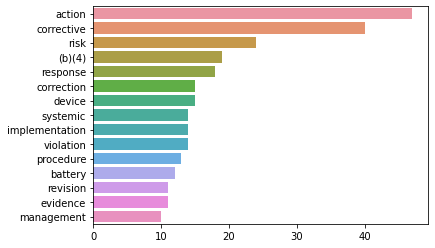

In [49]:
import seaborn as sns

sns.barplot(y=df_unigram[0].values[:15], x = df_unigram[1].values[:15])

<AxesSubplot:>

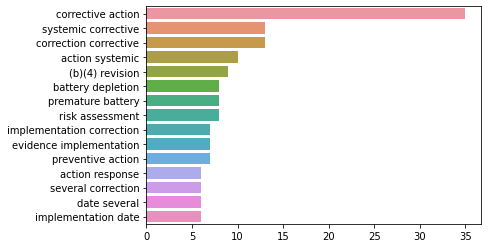

In [50]:
### bigram

bigram = defaultdict(int)
for word in generate_ngrams(text, n_gram= 2):
    bigram[word] += 1

df_bigram = pd.DataFrame(sorted(bigram.items(), key= lambda x:x[1])[::-1])

sns.barplot( y = df_bigram[0].values[:15], x = df_bigram[1].values[:15])

<AxesSubplot:>

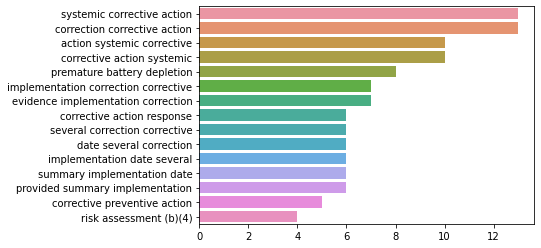

In [51]:
### trigram

trigram = defaultdict(int)
for word in generate_ngrams(text, n_gram = 3):
    trigram[word] += 1

df_trigram = pd.DataFrame(sorted(trigram.items(), key= lambda x: x[1])[::-1])

sns.barplot( y = df_trigram[0].values[:15], x = df_trigram[1].values[:15])

In [52]:
def find_all(a_str, sub):
    start = 0
    while True:
        start = a_str.find(sub, start)
        if start == -1: return
        yield start
        start += len(sub)

def find_specific(word, text_list):
    specific = list()
    for i, text in enumerate(text_list):
        if word.lower() in text:
            specific_index = list(find_all(text, word.lower()))
            for a in specific_index:
                print(i, a)
                print(text_list[i][(a-15):])
            specific.append(text_list[i][(a-15):])
    
    return specific

In [53]:
battery = find_specific(word='battery', text_list=jude1)

6 226
ly drained the battery your firm repeatedly concluded that the cause of premature depletion of greatbatch qhr2850 battery “could not be determined” your firm later categorized these a “unconfirmed” lithium bridge your firm’s corrective action and preventive action (capa) procedure (b)(4) revision aa state in section 20 the level of corrective action and preventive action shall be commensurate with the significance and risk of the nonconformance further section 50 state the risk evaluation of nonconformance is based on three factors: severity probability and detectability by basing your firm’s risk evaluation on “confirmed” case and not considering the potential for “unconfirmed” case to have been short your firm underestimated the occurrence of the hazardous situation this delayed initiation of capa #13-017 titled: lithium cluster short in m2850 cell until december 18 2013 and your firm continued to distribute device containing this battery until october 2016
6 325
tbatch qhr2850

<AxesSubplot:>

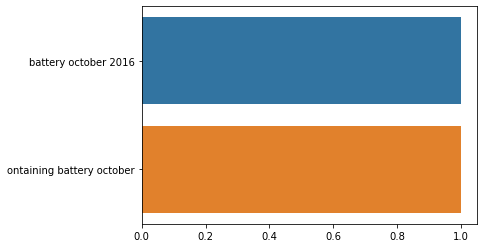

In [54]:
### trigram

trigram = defaultdict(int)
for word in generate_ngrams(battery[0], n_gram = 3):
    trigram[word] += 1

df_trigram = pd.DataFrame(sorted(trigram.items(), key= lambda x: x[1])[::-1])

sns.barplot( y = df_trigram[0].values[:15], x = df_trigram[1].values[:15])

In [55]:
corrective_action = find_specific(word= 'corrective action', text_list=jude1)

6 436
ge your firm’s corrective action and preventive action (capa) procedure (b)(4) revision aa state in section 20 the level of corrective action and preventive action shall be commensurate with the significance and risk of the nonconformance further section 50 state the risk evaluation of nonconformance is based on three factors: severity probability and detectability by basing your firm’s risk evaluation on “confirmed” case and not considering the potential for “unconfirmed” case to have been short your firm underestimated the occurrence of the hazardous situation this delayed initiation of capa #13-017 titled: lithium cluster short in m2850 cell until december 18 2013 and your firm continued to distribute device containing this battery until october 2016
6 545
0 the level of corrective action and preventive action shall be commensurate with the significance and risk of the nonconformance further section 50 state the risk evaluation of nonconformance is based on three factors: seve

# Topic Modeling(not useful)

In [56]:
# import tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# TfidfVectorizer

def getTopics(text, topicsNum):
    topic = ''
    vectorizer = TfidfVectorizer(stop_words= 'english',
                                max_features = 1000,
                                max_df = 0.8,
                                min_df = 0.05)
    #temp_list = list()
    #temp_list.append(text)
    X = vectorizer.fit_transform(text)

    print(X.shape)
    svd_model = TruncatedSVD(n_components=topicsNum, algorithm='randomized', n_iter= 100, random_state= 122)
    svd_model.fit(X)

    terms = vectorizer.get_feature_names()
    print('components output shape '+ str(svd_model.components_.shape))
    print(svd_model.components_)

    for i, comp in enumerate(svd_model.components_):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse= True)[:10]
        string = "Topic "+str(i+1) +": "
        for t in sorted_terms:
            string = string + t[0] + ' '
            topic = topic + t[0] + ' '
        print(string)

    print(topic)

In [57]:
getTopics(battery,10)

(4, 49)
components output shape (4, 49)
[[ 9.54487934e-02  3.92302927e-01  9.54487934e-02  9.54487934e-02
   5.17467486e-02  3.94523599e-02  9.54487934e-02  9.54487934e-02
   9.54487934e-02  5.17467486e-02  3.94523599e-02  9.54487934e-02
   1.06357619e-01  3.94523599e-02  3.94523599e-02  3.94523599e-02
   9.54487934e-02  5.17467486e-02  3.94523599e-02  1.90897587e-01
   9.54487934e-02  5.17467486e-02  1.91303581e-01  9.54487934e-02
   9.54487934e-02  1.90897587e-01  3.94523599e-02  3.94523599e-02
   3.94523599e-02  4.67555852e-01  4.02137726e-01  9.54487934e-02
   1.06357619e-01  3.94523599e-02  3.94523599e-02  5.17467486e-02
   1.90897587e-01  1.90897587e-01  3.94523599e-02  9.54487934e-02
   9.54487934e-02  5.17467486e-02  1.90897587e-01  1.90897587e-01
   9.54487934e-02  3.94523599e-02  5.17467486e-02  1.03493497e-01
   3.94523599e-02]
 [ 1.87830182e-16 -1.90769536e-01  2.22546735e-17  1.46810389e-16
   2.05939575e-01  1.57010874e-01  1.46810389e-16  1.46810389e-16
   1.46810389e-16

# Summary

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import string
from spacy.lang.en import English
#from heapq import nlargest
punctuations = string.punctuation
from spacy.language import Language

nlp = English()
nlp.add_pipe('sentencizer') # updated
parser = English()

In [1]:
def pre_process(document):
    clean_tokens = [ token.lemma_.lower().strip() for token in document ]
    clean_tokens = [ token for token in clean_tokens if token not in STOP_WORDS and token not in punctuations ]
    tokens = [token.text for token in document]
    lower_case_tokens = list(map(str.lower, tokens))
    
    return lower_case_tokens

In [2]:
def generate_numbers_vector(tokens):
    frequency = [tokens.count(token) for token in tokens]
    token_dict = dict(list(zip(tokens,frequency)))
    maximum_frequency=sorted(token_dict.values())[-1]
    normalised_dict = {token_key:token_dict[token_key]/maximum_frequency for token_key in token_dict.keys()}
    return normalised_dict

In [3]:
def sentences_importance(text, normalised_dict):
    importance ={}
    for sentence in nlp(text).sents:
        for token in sentence:
            target_token = token.text.lower()
            if target_token in normalised_dict.keys():
                if sentence in importance.keys():
                    importance[sentence]+=normalised_dict[target_token]
                else:
                    importance[sentence]=normalised_dict[target_token]
    return importance

In [4]:
def generate_summary(rank, text):
    target_document = parser(text)
    importance = sentences_importance(text, generate_numbers_vector(pre_process(target_document)))
    summary = nlargest(rank, importance, key=importance.get)
    return summary

In [5]:
num = 3
for i, text in enumerate(corrective_action):
    print(generate_summary(num, text))

NameError: name 'corrective_action' is not defined

1.      Failure to establish and maintain procedures for implementing corrective and preventive actions, as required by 21 CFR 820
2.      Failure to establish and maintain procedures to control product that does not conform to specified requirements, as required by 21 CFR 820
3.      Failure to ensure that design verification shall confirm that the design output meets the design input requirements, as required by 21 CFR 820
4.      Failure to ensure that design validation shall include risk analysis, where appropriate, as required by 21 CFR 820
1.      Your firm’s updated Cybersecurity Risk Assessments, (b)(4) Cybersecurity Risk Assessment, (b)(4), , Revision A, April 2, 2015 and Merlin@home Product Security Risk Assessment, (b)(4), Revision B, May 21, 2014 failed to accurately incorporate the third party report’s findings into its security risk ratings, causing your post-mitigation risk estimations to be acceptable, when, according to the report, several risks were not adequately con

In [623]:
def get_point_warning(text_list):
    a = 0
    for i, text in enumerate(text_list):
        if text[0].isnumeric() and (int(text[0]) > a):
            print(text[:(text.find(',',2))])
            a += 1

### Violation summary in Abbott (St. Jude) warning letters

In [624]:
get_point_warning(jude1)

1.      Failure to establish and maintain procedures for implementing corrective and preventive actions, as required by 21 CFR 820
2.      Failure to establish and maintain procedures to control product that does not conform to specified requirements, as required by 21 CFR 820
3.      Failure to ensure that design verification shall confirm that the design output meets the design input requirements, as required by 21 CFR 820
4.      Failure to ensure that design validation shall include risk analysis, where appropriate, as required by 21 CFR 820


## Same procedure can be applied for all the competitors data

In [585]:
medtronic_warning[2]

['>WARNING LETTERMedtronic Puerto Rico Operations Co.                                    MARCS-CMS 562437 —           August 23, 2018ShareTweetLinkedinEmailPrintRecipient:Recipient NameOmar IshrakMedtronic Puerto Rico Operations Co.710 Medtronic Parkway NEMinneapolis, MN 55432United StatesIssuing Office:Florida District OfficeUnited States      Office of Medical Device and Radiological Health Operations (OMDRHO)Division 2 Central555 Winderley Pl # 200Maitland, FL 32751Telephone: (407) 475-4700  WARNING LETTER CMS # 562437                                                                                                            UNITED PARCEL SERVICE w/ DELIVERY CONFIRMATION',
 'August 23, 2018',
 'Omar IshrakChairman & CEOMedtronic Inc.710 Medtronic Parkway NEMinneapolis, MN 55432',
 'Dear Mr. Ishrak:',
 'During an inspection of Medtronic Puerto Rico Operations Company (MPROC), located at Ceiba Norte Industrial Park, 50 Road 31, Km 24.4, Juncos, Puerto Rico, on April 23 through May 15, 

In [642]:
point = list()
for i, text in enumerate(medtronic_warning[2]):
    for ii, itext in enumerate(text):    
        if (itext.isnumeric() == True) and (medtronic_warning[2][i][ii+1:ii+5] == '.   '):
            print(text)
        #point.append(i)
    
    print(point)
    #print(point)
    #for i in point:
    #    print(text[i:(text.find('.',i))])


[]
[]
[]
[]
[]
This inspection revealed that these devices are adulterated within the meaning of section 501(h) of the Act, 21 U.S.C. § 351(h), in that the methods used in, or the facilities or controls used for, their manufacture, packing, storage, or installation are not in conformity with the current good manufacturing practice requirements of the Quality System regulation found at Title 21, Code of Federal Regulations (CFR), Part 820. You may find the Act and FDA’s regulations through links in FDA’s home page at www.fda.gov. We received your firm’s responses dated June 6 and July 13, 2018, concerning our investigators’ observations noted on the Form FDA 483 (FDA 483), Inspectional Observations, issued to your firm on May 15, 2018. We address these responses below in relation to violations observed during the inspection, which include: 1.    Failure to validate a process whose results cannot be fully verified by subsequent inspection and test according to established procedures, whi

In [604]:
medtronic_warning[2][5]

'This inspection revealed that these devices are adulterated within the meaning of section 501(h) of the Act, 21 U.S.C. § 351(h), in that the methods used in, or the facilities or controls used for, their manufacture, packing, storage, or installation are not in conformity with the current good manufacturing practice requirements of the Quality System regulation found at Title 21, Code of Federal Regulations (CFR), Part 820. You may find the Act and FDA’s regulations through links in FDA’s home page at www.fda.gov. We received your firm’s responses dated June 6 and July 13, 2018, concerning our investigators’ observations noted on the Form FDA 483 (FDA 483), Inspectional Observations, issued to your firm on May 15, 2018. We address these responses below in relation to violations observed during the inspection, which include: 1.    Failure to validate a process whose results cannot be fully verified by subsequent inspection and test according to established procedures, which is required